# Robótica Móvel - Projeto Final

In [49]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random

from scipy import ndimage
from tqdm import tqdm_notebook as tqdm

DPI = 200
FIG_SIZE = (8, 6)
HEATMAP_EXTENSION = 'png'

def get_neighbours(array, index):
    '''
        Get neighbour cells of the cell with given index in an array.

        @array: (numpy array) Array.
        @index: (int, int) Index of cell.

        @return: (numpy array) Array with the indices of neighbour cells.
    '''

    matrix = np.array(array)
    indices = tuple(np.transpose(np.atleast_2d(index)))
    arr_shape = np.shape(matrix)
    dist = np.ones(arr_shape)
    dist[indices] = 0
    dist = ndimage.distance_transform_cdt(dist, metric='chessboard')
    nb_indices = np.transpose(np.nonzero(dist == 1))
    return [tuple(x) for x in nb_indices]

def get_random_sampling_points(min_reward, max_reward, height, width, max_jump, map_file):
    environment_map = np.genfromtxt(map_file, delimiter=' ', dtype=int)

    output_name = map_file.split('/')[-1]
    map_name_without_extension = output_name.split('.')[0]
    plot_title = 'Recompensas no mapa {}'.format(map_name_without_extension)
    heatmap_name = 'heatmap_{}_min{}_max{}_j{}.{}'.format(map_name_without_extension, min_reward, max_reward, max_jump, HEATMAP_EXTENSION)
    rewards_name = 'rewards_{}_min{}_max{}_j{}.txt'.format(map_name_without_extension, min_reward, max_reward, max_jump)
    output_name = 'rewards_' + output_name
    
    array = [[-1 for _ in range(width)] for _ in range(height)]
    
    for i in tqdm(range(height), desc='Creating sampling points'):
        for j in range(width):
            if environment_map[i][j] == 1:  # Blocked cell
                array[i][j] = 0
                continue 

            if array[i][j] == -1: # not set
                neighbours = get_neighbours(array, (i, j))
                
                num = 0
                reward_sum = 0
                for (n_i, n_j) in neighbours:
                    if array[n_i][n_j] > 0:
                        reward_sum += array[n_i][n_j]
                        num += 1
                
                if num == 0:
                    array[i][j] = random.uniform(min_reward, max_reward)
                    continue
                else:                
                    average = reward_sum / num
                    
                    min_v = max(0, average - max_jump)
                    max_v = min(max_reward, average + max_jump)

                    array[i][j] = random.uniform(min_v, max_v)
    
    plt.figure(figsize=FIG_SIZE)
    plt.rc('font', size=15)
    plt.title(plot_title)
    plt.imshow(array, cmap=cm.jet)
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('./heatmaps/{}'.format(heatmap_name), dpi=DPI)
    plt.show()
    
    array = np.array(array)
    np.savetxt('./{}'.format(rewards_name), array, fmt='%.2f', delimiter=' ')
    return

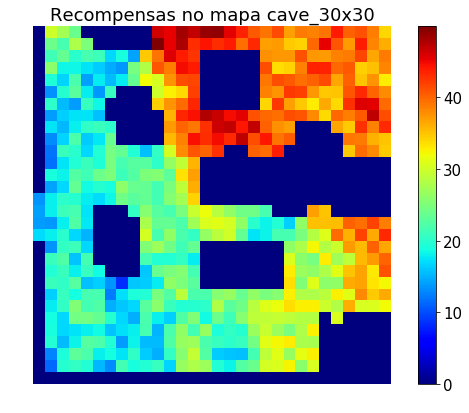

In [58]:
get_random_sampling_points(20, 50, 30, 30, 5, './occupancy_grid/cave_30x30.map')